In [26]:
# pip install PyMuPDF
#Library for wordcloud
# !pip -q install wordcloud
# !pip -q install stop-words

In [44]:
import fitz  # PyMuPDF
import re
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import rcParams
import requests
from PIL import Image
import numpy as np
import collections

In [45]:
# Cargar el archivo PDF
pdf_document = "D:/___plATZI/Business_Intelligence_Utilidad_Areas_opotunidad/Proyecto_Analizar_Discursos/Mensaje a la nación Fiestas Patrias.pdf" 
doc = fitz.open(pdf_document)

In [46]:
# Especificar las paginas  -->  paginas_a_extraer = [3, 72]
paginas_a_extraer = range(3, 73)   # Desde la pag. 4 hasta la pag. 73

# Extraer y mostrar el texto 
texto_extraido = ""
for pagina_num in paginas_a_extraer:
    pagina = doc.load_page(pagina_num)
    texto_extraido += pagina.get_text("text")

# Limpiar el texto extraído
# 1. Eliminar números de página que están solos en una línea
texto = re.sub(r'^\s*\d+\s*$', '', texto_extraido, flags=re.MULTILINE)
# 2. Eliminar saltos de línea adicionales
texto = re.sub(r'\n+', ' ', texto)
# 3. Eliminar espacios adicionales
texto = re.sub(r'\s+', ' ', texto)

# Mostrar el texto limpio
print(texto)

 Señor presidente del Congreso de la República; Señoras y señores congresistas; Señor Presidente del Consejo de Ministros; Señoras y señores ministros; Señoras y señores miembros del cuerpo diplomático; Distinguidas autoridades civiles, militares y religiosas; Ilustres invitados; Señoras y señores de la prensa nacional e internacional; Queridos compatriotas; REFLEXIÓN INICIAL: El Espíritu del Bicentenario En cumplimiento de la Constitución Política y, poniendo como testigos a todas las peruanas y peruanos, de hoy y de siempre, me presento ante el Congreso de la República para exponer mi Mensaje a la Nación, en el contexto de lo que podríamos denominar “El espíritu del Bicentenario”. Como todos sabemos, por las circunstancias políticas que vivió el país y que todos conocemos, ante este congreso asumí constitucionalmente la presidencia de la República, una decisión que me honra por ser la primera mujer en llegar a la más alta magistratura del país en más de 200 años de vida republicana. 

### **Word cloud**

In [47]:
# Las palabras que queremos ignorar
from stop_words import get_stop_words 

#Spanish StopWords
stop_words_es = get_stop_words('es') 

In [48]:
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud instalada e importada!')

Wordcloud instalada e importada!


In [49]:
# Importar stopwords adicionales 
stop_words = ["año", "mil", "millones", "soles", "ciento", "El", "En", "La", "país.", "Señor", 
              "Presidente", "través", "que,"] + stop_words_es 

In [50]:
# Iniciar objeto Wordcloud
amlo_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stop_words
)

In [51]:
#Generar Wordcloud
amlo_wc.generate(texto)

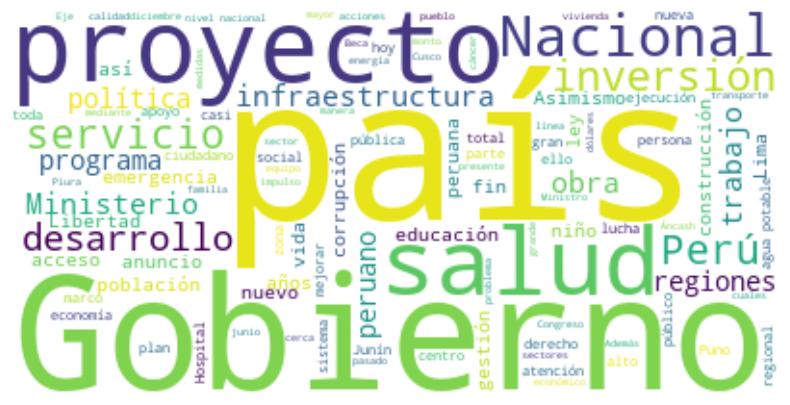

In [52]:
# Mostrar Wordcloud
plt.figure(figsize=(10, 5)) # Establecer el tamaño de la figura
plt.imshow(amlo_wc, interpolation='bilinear')
plt.axis('off')  # Desactiva los ejes
plt.show()

In [53]:
mask_image_path = 'D:/___plATZI/Business_Intelligence_Utilidad_Areas_opotunidad/Proyecto_Analizar_Discursos/mapa_peru.png'
mask = np.array(Image.open(mask_image_path))

print('Imagen descargada y guardada')

Imagen descargada y guardada


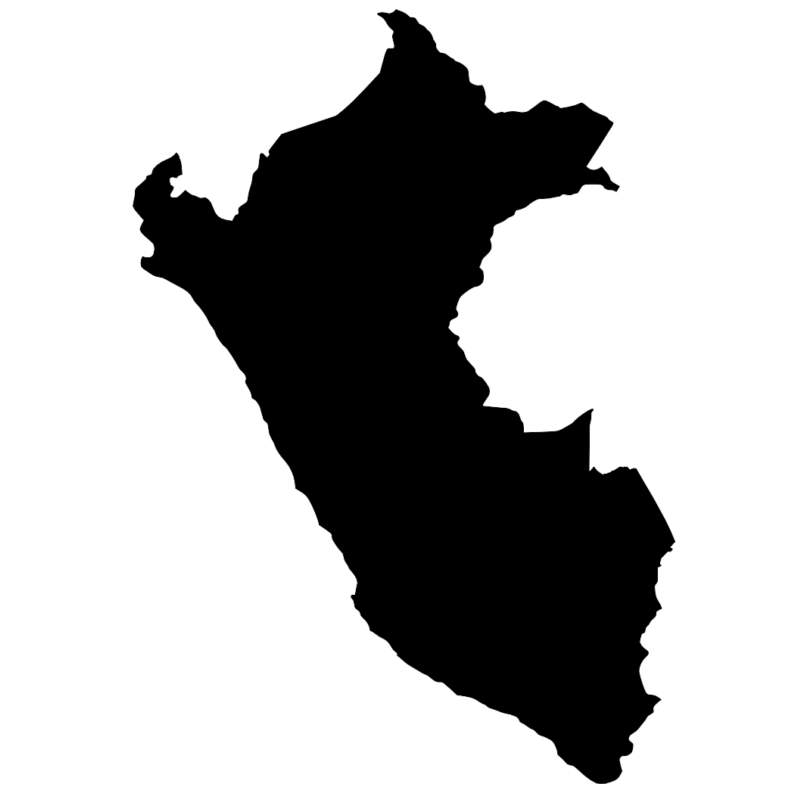

In [54]:
fig = plt.figure()
fig.set_figwidth(10) # set width
fig.set_figheight(14) # set height

plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

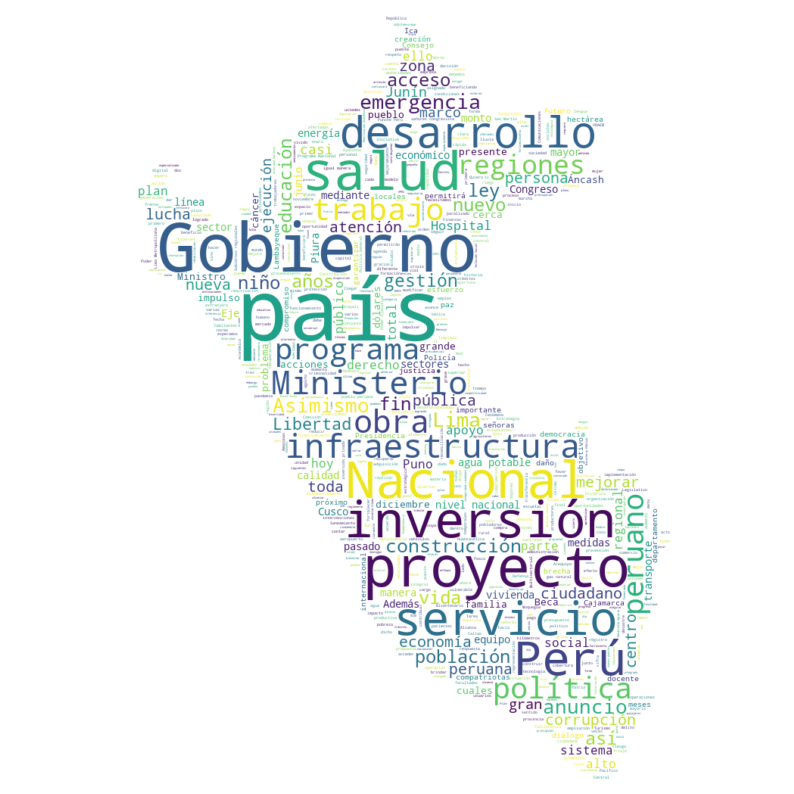

In [64]:
# Iniciar objeto Wordcloud
amlo_wc = WordCloud(background_color='white', max_words=2000, mask=mask, stopwords=stop_words)

# Generar Wordcloud
amlo_wc.generate(texto)

# Mostrar wordcloud
fig = plt.figure()
fig.set_figwidth(10) # set width / ancho
fig.set_figheight(14) # set height / alto


plt.imshow(amlo_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

### **Conteo de Palabras**

In [56]:
filtered_words = [word for word in texto.split() if word not in stop_words]
counted_words = collections.Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)

<BarContainer object of 10 artists>

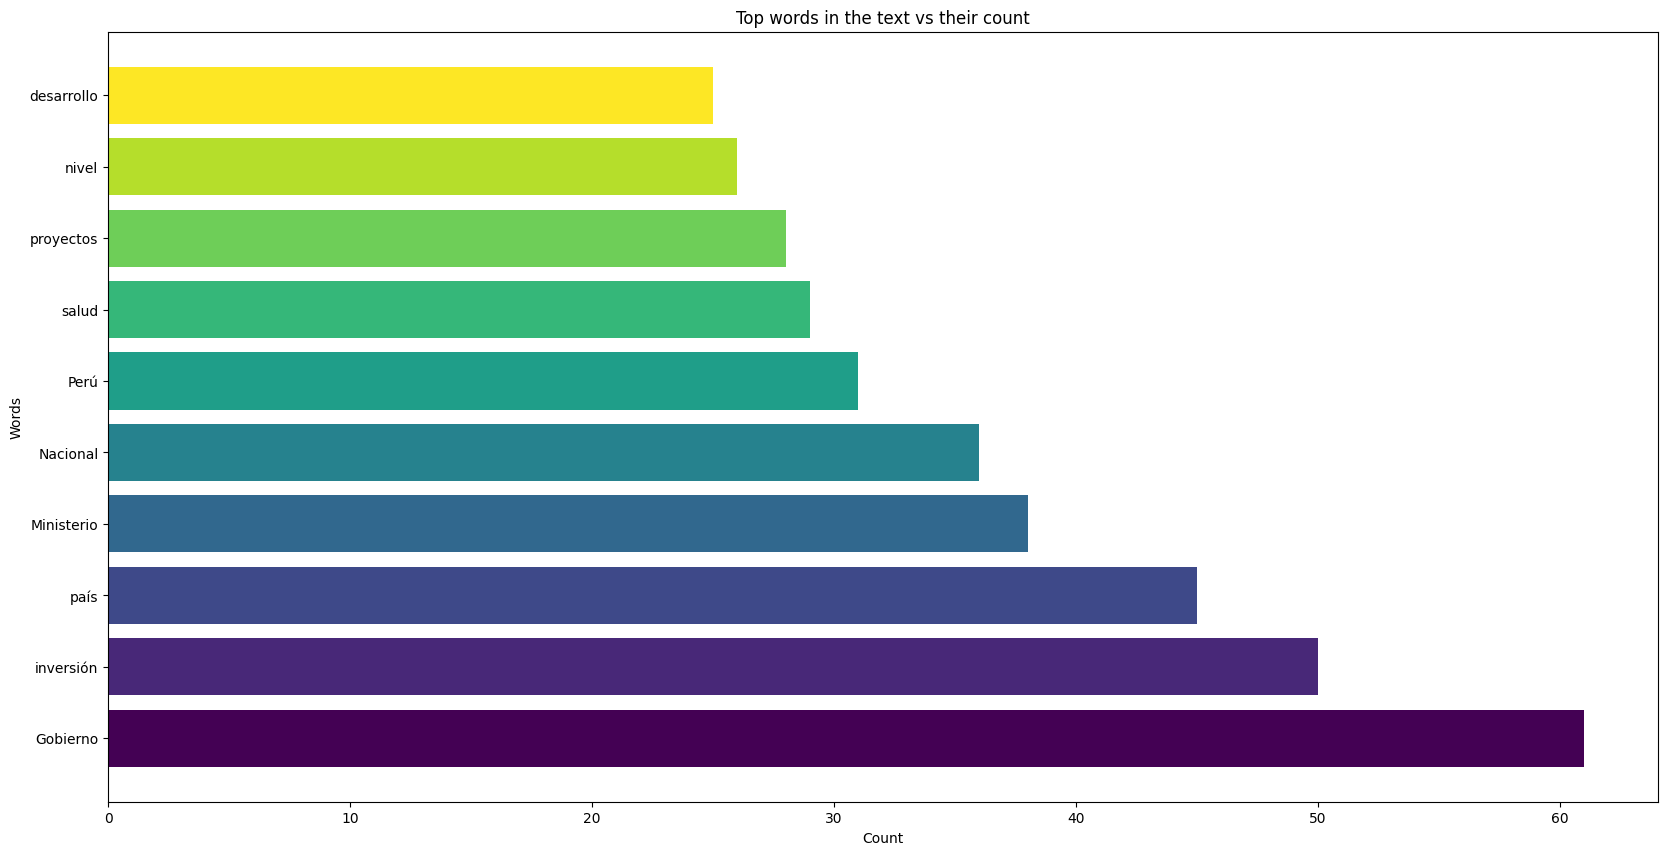

In [57]:
colors = cm.viridis(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Top words in the text vs their count')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)

### **Segundo discurso**

In [58]:
pdf_document = "D:/___plATZI/Business_Intelligence_Utilidad_Areas_opotunidad/Proyecto_Analizar_Discursos/MENSAJE A LA NACIÓN DE LA SEÑORA PRESIDENTA DE LA REPÚBLICA.pdf" 
doc = fitz.open(pdf_document)

In [59]:
# Especificar las paginas
paginas_a_extraer_2 = range(0, 3) 

# Extraer y mostrar el texto 
texto_extraido_2 = ""
for pagina_num in paginas_a_extraer_2:
    pagina = doc.load_page(pagina_num)
    texto_extraido_2 += pagina.get_text("text")

# Limpiar el texto extraído
texto_2 = re.sub(r'^\s*\d+\s*$', '', texto_extraido_2, flags=re.MULTILINE)
texto_2 = re.sub(r'\n+', ' ', texto_2)
texto_2 = re.sub(r'\s+', ' ', texto_2)

# Mostrar el texto limpio
print(texto_2)

 MENSAJE A LA NACIÓN DE LA SEÑORA PRESIDENTA DE LA REPÚBLICA, DINA BOLUARTE ZEGARRA 29 de enero de 2023 Queridos compatriotas: En los últimos días, como todos lo hemos apreciado, el país se ha visto envuelto en una espiral de violencia que ha perjudicado a todo el Perú, pero, sobre todo, a los más desfavorecidos. Pudimos apreciar con indignación que nuestra Policía Nacional ha sido agredida a mansalva por un grupo organizado de individuos que quieren sembrar el caos y el odio entre los peruanos. A esa misma hora, el Congreso de la República debatía el adelanto de elecciones al 2023. Y como ya sabemos a esta hora: un debate estéril que no se ha llegado a nada concreto, excepto la reconsideración que mañana va a debatirse y que, esperamos, merezca una segunda reflexión, dada la gravedad de la situación. Reitero que este vacío es inaceptable para el Perú. Las autoridades que representamos al Estado, tenemos el deber de proteger a todas y todos los peruanos, salvaguardando la seguridad del

In [60]:
stop_words_2 = ["año", "mil", "millones", "soles", "ciento", "El", "En", "La", "través","SEÑORA", "LA"] + stop_words_es 

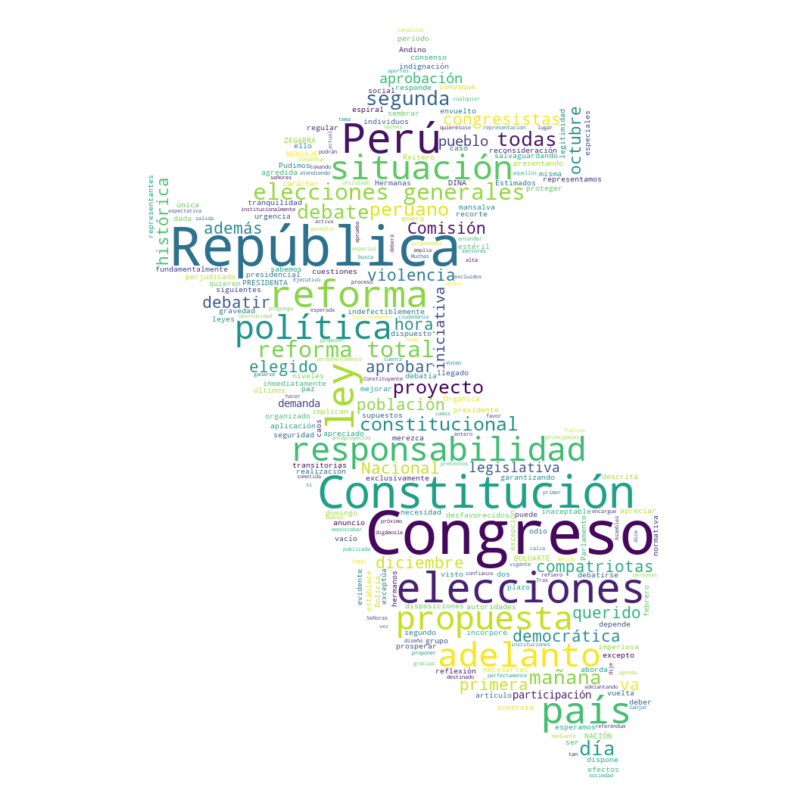

In [65]:
# Iniciar objeto Wordcloud
amlo_wc = WordCloud(background_color='white', max_words=2000, mask=mask, stopwords=stop_words_2)

# Generar Wordcloud
amlo_wc.generate(texto_2)

# Mostrar wordcloud
fig = plt.figure()
fig.set_figwidth(10) # set width / ancho
fig.set_figheight(14) # set height / alto


plt.imshow(amlo_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [62]:
filtered_words_2 = [word for word in texto_2.split() if word not in stop_words_2]
counted_words_2 = collections.Counter(filtered_words_2)

words = []
counts = []
for letter, count in counted_words_2.most_common(10):
    words.append(letter)
    counts.append(count)

<BarContainer object of 10 artists>

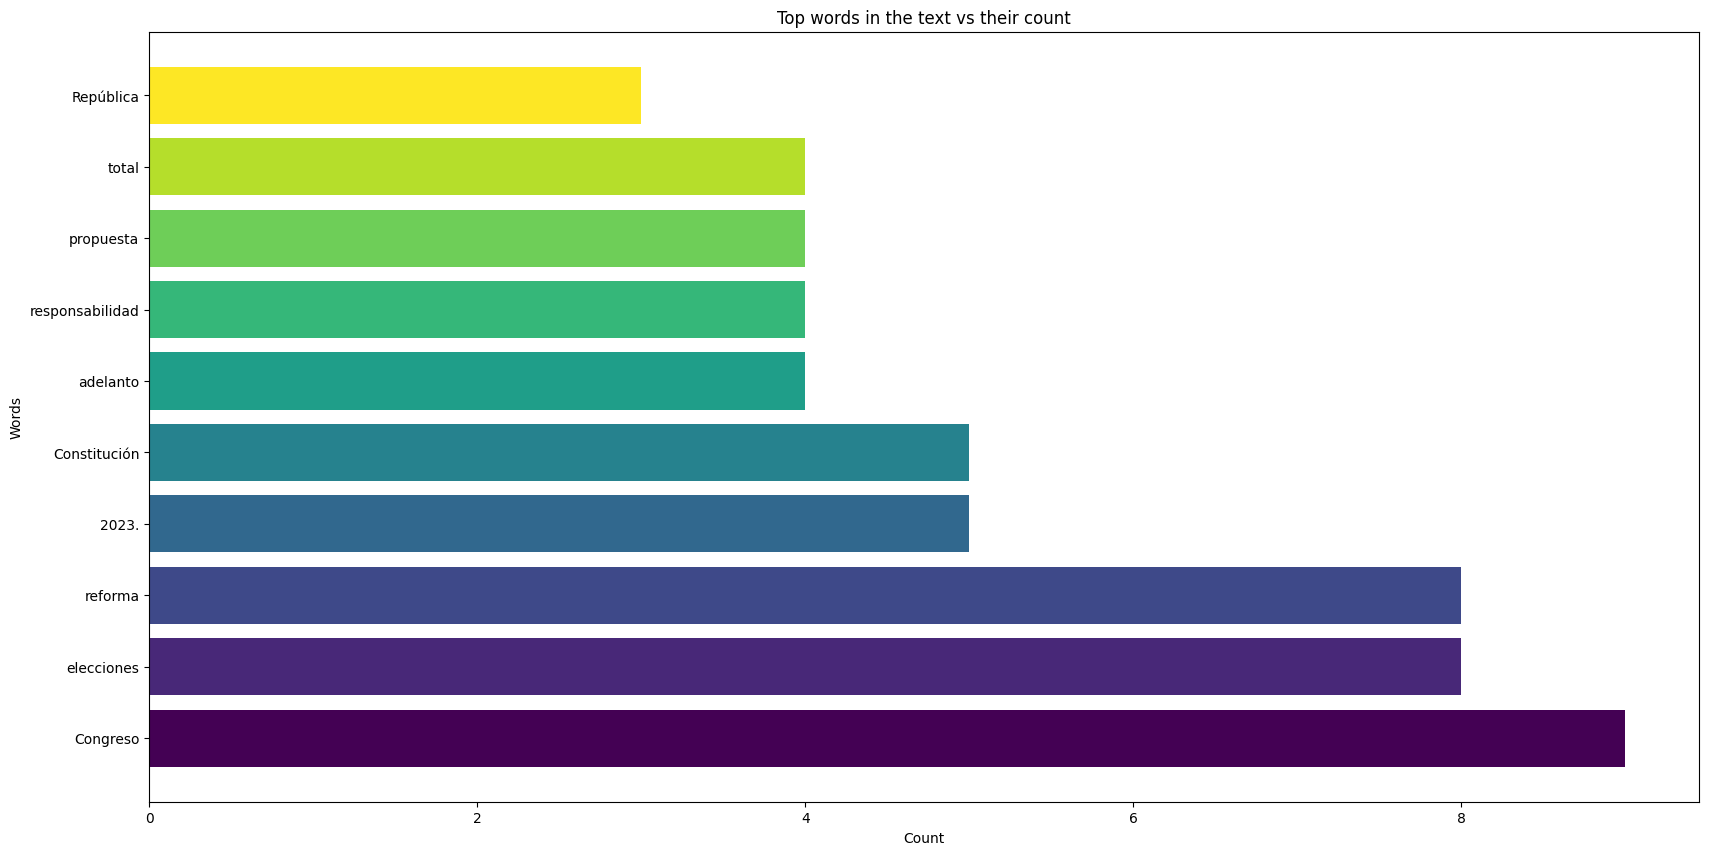

In [63]:
colors = cm.viridis(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Top words in the text vs their count')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)